In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("/home/jordan/Downloads/Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# K Means

Define inputs

In [14]:
X = df[['Age', 'Spending Score (1-100)']].copy()
wcss = []

Find ideal number of clusters

In [12]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Plots:

Text(0, 0.5, 'WCSS')

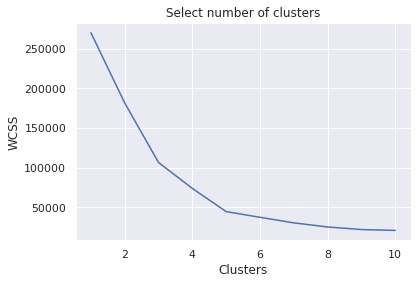

In [13]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Select number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

# Gaussian Mixture Model

In [1]:
from sklearn.mixture import GaussianMixture

In [26]:
n_clusters = 5
gmm_model = GaussianMixture(n_components = n_clusters)
gmm_model.fit(X)

cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels
colour = ['blue', 'green', 'red', 'yellow', 'orange']

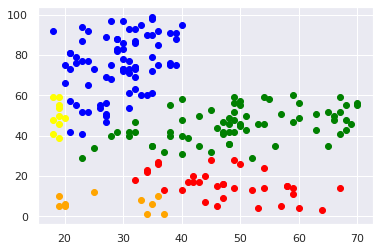

In [27]:
for k in range(0,n_clusters):
    data = X[X['cluster']==k]
    plt.scatter(data['Age'], data['Spending Score (1-100)'], c=colour[k])

# Spectral Clustering

In [30]:
from sklearn.cluster import SpectralClustering

In [31]:
spectral_cluster_model = SpectralClustering(
    n_clusters=5, 
    random_state=25,
    n_neighbors=8,
    affinity='nearest_neighbors'
)

In [32]:
X['cluster'] = spectral_cluster_model.fit_predict(X[['Age', 'Spending Score (1-100)']])

[Text(0.5, 1.0, 'Spectral Clustering')]

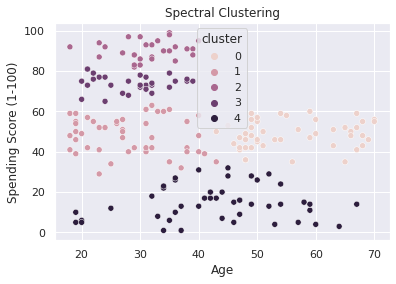

In [33]:
fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='Spending Score (1-100)', data = X, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')